### Step1. 검증용 데이터셋 준비

In [1]:
import os

In [2]:
path1 = os.getenv('HOME')+'/aiffel/ocr_python/img1.png'
path2 = os.getenv('HOME')+'/aiffel/ocr_python/img2.png'
path3 = os.getenv('HOME')+'/aiffel/ocr_python/img3.png'
path4 = os.getenv('HOME')+'/aiffel/ocr_python/img4.png'

### Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

## 1. Google OCR API

In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [4]:

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'

path_list = [path1, path2, path3, path4]

path = os.getenv('HOME')+'/aiffel/ocr_python/img1.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
# detect_text(path)


for ind, val in enumerate(path_list):
    print()
    print(str(ind +1) + '.')
    detect_text(val)
    


1.
Texts:

"PENGUINS
CROSSING
"

"PENGUINS"

"CROSSING"
bounds: (107,476),(327,476),(327,534),(107,534)

2.
Texts:

"POR S C H E
9 arrera S
coton
1444 7504
PORS CHE
"

"POR"

"S"

"C"

"H"

"E"

"9"

"arrera"

"S"

"coton"

"1444"

"7504"

"PORS"

"CHE"
bounds: (725,739),(758,739),(758,746),(725,746)

3.
Texts:

"PEPPE
|오뚜기직접갈아먹는통후추 50g| 청정원 후추 100G
5,980 4,480
10G당 1,196원
10G당 448원
8801045450445
8801052204031
OF
"

"PEPPE"

"|"

"오뚜기"

"직접"

"갈아"

"먹는"

"통후추"

"50g"

"|"

"청정원"

"후추"

"100G"

"5,980"

"4,480"

"10G"

"당"

"1,196"

"원"

"10G"

"당"

"448"

"원"

"8801045450445"

"8801052204031"

"OF"
bounds: (102,316),(100,361),(66,359),(68,314)

4.
Texts:

"비보호
직진신호시
|좌회전가능
"

"비보호"

"직진"

"신호"

"시"

"|"

"좌회전"

"가능"
bounds: (377,293),(423,295),(422,317),(376,315)


# 2. keras-ocr

In [5]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [6]:
path_list

['/aiffel/aiffel/ocr_python/img1.png',
 '/aiffel/aiffel/ocr_python/img2.png',
 '/aiffel/aiffel/ocr_python/img3.png',
 '/aiffel/aiffel/ocr_python/img4.png']

In [7]:
import cv2

In [8]:
images = []
for i in range(len(path_list)):
    img = cv2.imread(path_list[i])
    images.append(img)

In [9]:
images

[array([[[159,  79,  14],
         [159,  79,  14],
         [159,  79,  14],
         ...,
         [168,  92,  10],
         [168,  92,  10],
         [168,  92,  10]],
 
        [[159,  79,  14],
         [159,  79,  14],
         [159,  79,  14],
         ...,
         [168,  92,  10],
         [168,  92,  10],
         [168,  92,  10]],
 
        [[159,  79,  14],
         [159,  79,  14],
         [159,  79,  14],
         ...,
         [168,  90,   7],
         [168,  90,   7],
         [168,  90,   7]],
 
        ...,
 
        [[ 68, 119, 135],
         [ 67, 118, 134],
         [ 64, 116, 132],
         ...,
         [ 71, 128, 153],
         [ 72, 129, 154],
         [ 73, 130, 155]],
 
        [[ 74, 123, 137],
         [ 71, 122, 138],
         [ 70, 121, 137],
         ...,
         [ 70, 127, 152],
         [ 71, 129, 151],
         [ 72, 129, 154]],
 
        [[ 75, 121, 139],
         [ 70, 120, 138],
         [ 72, 118, 136],
         ...,
         [ 71, 128, 150],
  

In [11]:
prediction_groups = [pipeline.recognize([img]) for img in images ]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


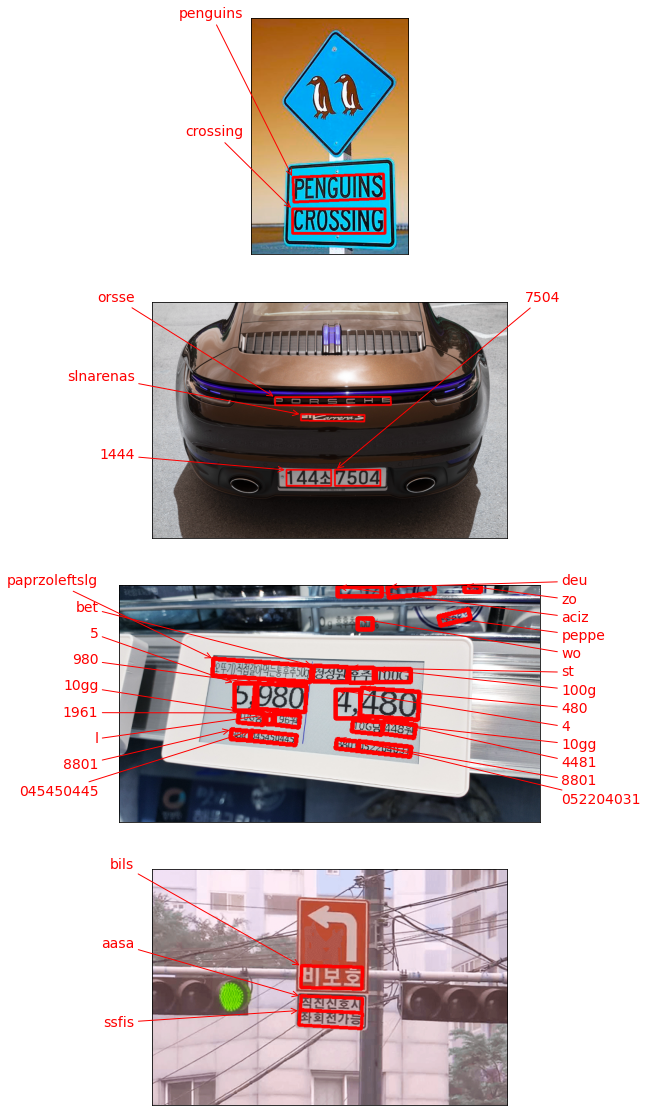

In [12]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# 3. 테서랙트

In [36]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path = './images/sample.png', output_path = './output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


# work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
# work_dir_1 = os.getenv('HOME')+'/aiffel/ocr_python/img4'
# img_file_path1 = work_dir + '/img1.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

# cropped_image_path_list1 = crop_word_regions(img_file_path1, work_dir_1)

In [37]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
# recognize_images(cropped_image_path_list1)

In [41]:
cropped_list = []

for i in range(3):
    stri = str(i+1)
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
    work_dir_1 = os.getenv('HOME')+'/aiffel/ocr_python/img' + stri
    img_file_path = work_dir + '/img' + str(i+1) + '.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

    print(img_file_path)
    cropped_image_path_list1 = crop_word_regions(img_file_path, work_dir_1)
    
    cropped_list.append(cropped_image_path_list1)

/aiffel/aiffel/ocr_python/img1.png
/aiffel/aiffel/ocr_python/img1/0000.png
/aiffel/aiffel/ocr_python/img1/0001.png
/aiffel/aiffel/ocr_python/img1/0002.png
/aiffel/aiffel/ocr_python/img1/0003.png
/aiffel/aiffel/ocr_python/img1/0004.png
/aiffel/aiffel/ocr_python/img1/0005.png
/aiffel/aiffel/ocr_python/img1/0006.png
/aiffel/aiffel/ocr_python/img1/0007.png
/aiffel/aiffel/ocr_python/img1/0008.png
/aiffel/aiffel/ocr_python/img1/0009.png
/aiffel/aiffel/ocr_python/img2.png
/aiffel/aiffel/ocr_python/img2/0000.png
/aiffel/aiffel/ocr_python/img2/0001.png
/aiffel/aiffel/ocr_python/img2/0002.png
/aiffel/aiffel/ocr_python/img2/0003.png
/aiffel/aiffel/ocr_python/img2/0004.png
/aiffel/aiffel/ocr_python/img2/0005.png
/aiffel/aiffel/ocr_python/img2/0006.png
/aiffel/aiffel/ocr_python/img3.png
/aiffel/aiffel/ocr_python/img3/0000.png
/aiffel/aiffel/ocr_python/img3/0001.png
/aiffel/aiffel/ocr_python/img3/0002.png
/aiffel/aiffel/ocr_python/img3/0003.png
/aiffel/aiffel/ocr_python/img3/0004.png
/aiffel/aiffel/

In [43]:
cropped_list[0]

['/aiffel/aiffel/ocr_python/img1/0000.png',
 '/aiffel/aiffel/ocr_python/img1/0001.png',
 '/aiffel/aiffel/ocr_python/img1/0002.png',
 '/aiffel/aiffel/ocr_python/img1/0003.png',
 '/aiffel/aiffel/ocr_python/img1/0004.png',
 '/aiffel/aiffel/ocr_python/img1/0005.png',
 '/aiffel/aiffel/ocr_python/img1/0006.png',
 '/aiffel/aiffel/ocr_python/img1/0007.png',
 '/aiffel/aiffel/ocr_python/img1/0008.png',
 '/aiffel/aiffel/ocr_python/img1/0009.png']

In [44]:
recognize_images(cropped_list[0])


SA


—


=

a a as




Done


In [45]:
recognize_images(cropped_list[1])


c= NS

‘144A 7504

EP

a

SS pp


Done


In [46]:
recognize_images(cropped_list[2])

ee

— Me | we J NS

Pp


i =

na

— ee

reer


PFA AZo}

FF Ug

aaa

o=t

1G0G

a

5,980

4,480

lUGa

|, S67

1OGo

4484

3501045450445

430105220493)

Done


# 결론

1. 우편번호, 자동차 번호판, 여러 일련번호를 인식하고 해석하기위해서 OCR을 사용한다.
2. 무인 주차 시스템을 만들때, 자동차의 번호판을 인식하고 해석한다.
3. 위의 시스템을 만들경우 한글과 영어가 있는지 주의해야한다.
4. 가장 나은 모델은  Google의 OCR API이다.